In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
maf_data = pd.read_csv("HtM_MAF Data_Final.csv")

msp_data = pd.read_csv('HTM_MSP_Final.csv',
                      header = 0,
                     names = ['Aircraft', 'Squadron', 'Lot', 'MSP', 'ZULU_Time', 'Flight_Mode'], 
                     dtype = {'Aircraft': 'category',
                             'Squadron': 'category',
                             'Lot': 'category',
                             'MSP': 'category',
                             'Flight_Mode': 'category'})

In [3]:
maf_data.count()

Job Code                          362281
Aircraft                          362281
Transaction Code                  362281
Malfunction Code                  353475
Action Taken Code                 362271
Description of Problem            362281
Correction of Problem             362281
Received Date                     362281
Completion Date                   362274
Corrosion                          18377
Bare Metal                         14644
Corrosion Prevention Treatment      9834
Routine Maintenance               193185
Unscheduled Maintenance           111761
Mission-Related Maintenance        16514
Failure                             8500
dtype: int64

In [4]:
msp_data.count()

Aircraft       2047125
Squadron       2047125
Lot            2047125
MSP            2047125
ZULU_Time      2047125
Flight_Mode    2047125
dtype: int64

In [5]:
# Two different ways of getting column count

In [6]:
maf_data['Aircraft'].count()
maf_data.Aircraft.count()

362281

In [7]:

(maf_data.Aircraft == 1).sum()
#maf_data.query('Aircraft == "1" ').Aircraft.count()

6509

In [8]:
# Shows by value by row

In [9]:
maf_data.Aircraft.value_counts
maf_data['Aircraft'].value_counts

<bound method IndexOpsMixin.value_counts of 0         42
1         42
2         42
3         42
4         42
          ..
362276    38
362277    38
362278    38
362279     3
362280    15
Name: Aircraft, Length: 362281, dtype: int64>

In [10]:
# Shows frequency of each airplane

In [11]:
freq = maf_data['Aircraft'].value_counts()

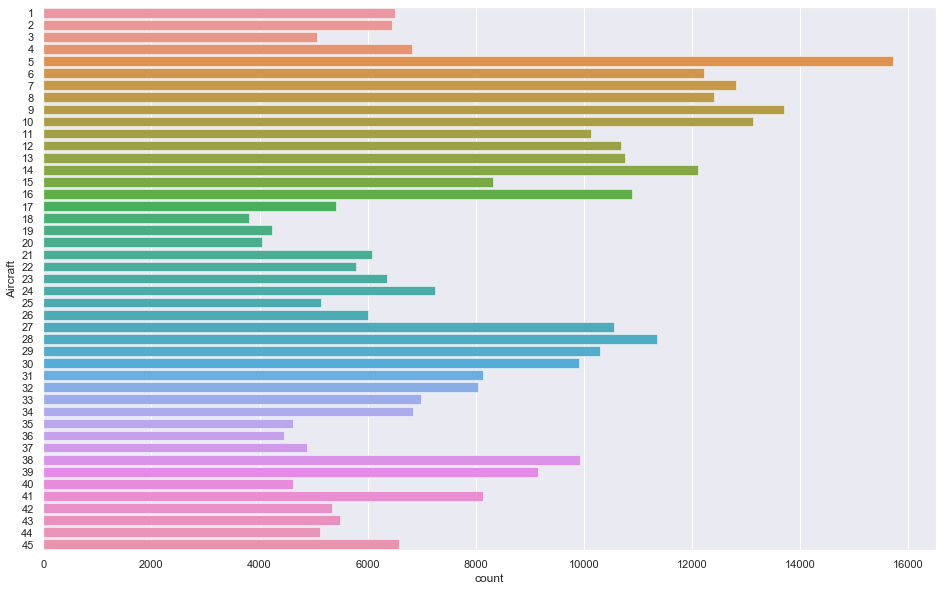

In [12]:
"""""
ax = maf_data['Aircraft'].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)    #['Aircraft'].value_counts()
ax.set_xlabel("Aircraft",fontsize = 12)
ax.set_ylabel("Num", fontsize=12)
plt.show()
"""""
#fig , ax = plt.subplots
#maf_data['Aircraft'].value_counts().plot(ax=ax, kind='bar')
sns.set(style="darkgrid")
plt.figure(figsize=(16, 10))
ax = sns.countplot(y="Aircraft",linewidth = 0.5 , data = maf_data)

In [13]:
#Pulls three columns from maf data

In [14]:
#corrosion_actions = maf_data[maf_data['Corrosion']| maf_data['Bare Metal'] | maf_data['Corrosion Prevention Treatment']]
maf_data['Received Date'] = pd.to_datetime(maf_data['Received Date'])
maf_data['Completion Date'] = pd.to_datetime(maf_data['Completion Date'])
corrosion_actions = maf_data.loc[0:,['Corrosion', 'Bare Metal' , 'Corrosion Prevention Treatment', 'Received Date', 'Completion Date','Aircraft']]
corrosion_actions.head(13)

,Corrosion,Bare Metal,Corrosion Prevention Treatment,Received Date,Completion Date,Aircraft
0,NaN,NaN,NaN,2012-04-26,2014-02-27,42
1,NaN,NaN,NaN,2012-04-26,2014-02-27,42
2,NaN,NaN,NaN,2012-04-26,2014-02-27,42
3,NaN,NaN,NaN,2012-04-26,2014-02-27,42
4,NaN,NaN,NaN,2012-04-26,2014-02-27,42
5,NaN,NaN,NaN,2012-04-26,2014-02-27,42
6,NaN,NaN,NaN,2012-04-26,2014-02-27,42
7,NaN,NaN,NaN,2012-04-26,2014-02-27,42
8,NaN,NaN,NaN,2012-04-26,2014-02-27,42
9,NaN,NaN,NaN,2012-04-26,2014-02-27,42


In [15]:
corrosion_actions["action_month"] = pd.DatetimeIndex(corrosion_actions['Completion Date']).month

corrosion_actions["action_year"] = pd.DatetimeIndex(corrosion_actions['Completion Date']).year
corrosion_actions.head(10)

,Corrosion,Bare Metal,Corrosion Prevention Treatment,Received Date,Completion Date,Aircraft,action_month,action_year
0,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0
1,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0
2,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0
3,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0
4,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0
5,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0
6,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0
7,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0
8,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0
9,NaN,NaN,NaN,2012-04-26,2014-02-27,42,2.0,2014.0


In [17]:
#msp_data.count()

msp_data['Fault Date'] = pd.to_datetime(msp_data['ZULU_Time'].str.split(" ", n = 2, expand = True)[1])    

msp_data['Fault Time'] = pd.to_datetime(msp_data['ZULU_Time'].str.split(" "
    , n = 2, expand = True)[2], format = '%H:%M:%S:%f', errors='ignore')

msp_data['Fault Time'] = pd.to_datetime(msp_data['ZULU_Time'].str.split(" "
    , n = 2, expand = True)[2], format = '%H:%M:%S', errors='ignore')
#msp_data.count()
msp_data.head()

,Aircraft,Squadron,Lot,MSP,ZULU_Time,Flight_Mode,Fault Date,Fault Time
0,1,HH,100,ZJMZTL,01-APR-2014 00:25:39:00,EngineTurn,2014-04-01,00:25:39:00
1,1,HH,100,JDJDMQ,01-APR-2014 00:25:39:00,EngineTurn,2014-04-01,00:25:39:00
2,1,HH,100,RTVBHP,01-APR-2014 00:25:39:00,EngineTurn,2014-04-01,00:25:39:00
3,1,HH,100,RTUXHP,01-APR-2014 00:25:39:00,EngineTurn,2014-04-01,00:25:39:00
4,1,HH,100,RTUXMZ,01-APR-2014 00:25:39:00,EngineTurn,2014-04-01,00:25:39:00


In [ ]:
msp_data['action_year'] = pd.DatetimeIndex(msp_data['Fault Date']).year


combined_data = corrosion_actions.merge(msp_data[['Aircraft', 'action_year', 'MSP', 'Flight_Mode', 'Fault Date']],how='left',  on = ['Aircraft', 'action_year'])

In [ ]:
combined_data['before_window'] = combined_data['Completion Date'] - pd.DateOffset(months = 1)

combined_data['after_window'] = combined_data['Completion Date'] + pd.DateOffset(months = 1)

combined_data.head(50)

In [ ]:
combined_data = combined_data['Fault Date'] < combined_data['after_window']
combined_data = combined_data['Fault Date'] > combined_data['before_window']
combined_data['Pre'] = combined_data['Fault Date'] < combined_data['Completion Date']
combined_data.head()

In [ ]:
combined_data = combined_data[(combined_data['Fault Date'] > combined_data['Completion Date']) | (combined_data['Fault Date'] < combined_data['Received Date'])]
combined_data.head()